<a href="https://colab.research.google.com/github/valesierrai/Integracion-de-Datos-y-Prospectiva/blob/main/Proyecto_Final_VSI_NGM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Proyecto Final**

**Valeria Sierra Ibarra y Natalia Giraldo Mesa**


•	Seleccionar como mínimo dos bases de datos de la plataforma Google Data Search o Kaggle.com, que posean como mínimo dos variables numéricas similares como base para la integración de los datos.

•Para el reto se debe hacer una descripción clara de las bases de datos, así como la descripción de cada una de las variables, indicando claramente las variables potenciales de integración.

•Para la integración de las bases de datos, se deben tomar como mínimo dos modelos vistos en clase, entre los que se destaque el modelo de integración por mapas de integración borrosos, y que fue desarrollado en el Parcial II.

•Cada presentación o portafolio debe estar conformado por un grupo de trabajo máximo de dos integrantes.

•Creación de un video con una duración máxima de 10 minutos, en donde se presentan los principales hallazgos encontrados a los datos, y que pueden ayudar a la toma de decisiones de una organización.

•El análisis de resultados se debe consignar en un documento de trabajo en la plataforma Google Colab, siguiendo los lineamientos dados a lo largo del curso. En el Buzón del reto se debe compartir el link a dicho documento.

•La asistencia a la presentación debe ser presencial y se debe permanecer hasta la final de todas las presentaciones.

•El portafolio debe alojarse en la plataforma GitHub. •	Para la presentación se puede tomar como base el siguiente video de referencia: https://www.youtube.com/watch?v=2oaUYKH57Hs



*   Base Datos Original: crop_production.csv
https://www.kaggle.com/datasets/thedevastator/statewise-crop-production-in-india-a-statistical
*   Base Datos Externos: Crop_Production_Statistics.csv
https://www.kaggle.com/datasets/zsinghrahulk/india-crop-yield

##0. Se cargan librerias de trabajo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

from scipy.stats import skew #Coeficiente de Asimetría
from scipy.stats import kurtosis #Kurtosis

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1. Se cargan y se organizan las bases de datos

In [ ]:
#Datos Originales
dfo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Integración de Datos y Prospectiva/Bases de Datos/crop_production.csv')
dfo = dfo.dropna()

#Datos Externos
dfe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Integración de Datos y Prospectiva/Bases de Datos/Crop_Production_Statistics.csv')
dfe = dfe.dropna()

In [ ]:
#Creamos una columna llamada yield que sea la división entre el area y la producción
dfo['Yield'] = dfo['Production']/dfo['Area']

#Limpieza de datos columna "yield" valores menores 3
dfo = dfo[dfo['Yield'] < 3]

#Limpieza de datos columna "yield" valores menores 3
dfe = dfe[dfe['Yield'] < 3]

In [ ]:
#Seleccionamos las variables de trabajo
dfo= np.array(dfo[['Production','Yield']])
dfe= np.array(dfe[['Production','Yield']])

##2. Proceso de Clústerización de las Variables

In [ ]:
np.random.seed(42)
NC=5

def clusterizacion_frecuencia_severidad(XDB):
  #1. Clusterización de Frecuencia
  mkmf = KMeans(n_clusters=NC, init='random',random_state=42)
  mkmf.fit(XDB[:,0].reshape(-1,1))
  XCf = mkmf.cluster_centers_

  #Los organizamos de menor a mayor
  XCf = np.array(sorted(XCf))

  #Labels - Cualidades
  lbf= ['Muy Pocos', 'Pocos', 'Más o Menos', 'Muchos', 'Bastantes']

  #Se busca la base de cada conjunto borroso (Valor de Pertenencia)
  sigmaf = np.zeros((NC, 1))

  for j in range(NC):
    sigmaf[j,]= np.sum(np.abs(XCf-XCf[j]))/4

  #2. Clusterización de Severidad
  mkms = KMeans(n_clusters=NC, init='random',random_state=42)
  mkms.fit(XDB[:,1].reshape(-1,1))

  XCs = mkms.cluster_centers_

  #Los organizamos de menor a mayor
  XCs = np.array(sorted(XCs))

  #Labels - Cualidades
  lbs= ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']

  #Se busca la base de cada conjunto borroso (Valor de Pertenencia)
  sigmas = np.zeros((NC, 1))

  for j in range(NC):
    sigmas[j,]= np.sum(np.abs(XCs-XCs[j]))/4

  return XCf, lbf, sigmaf, XCs, lbs, sigmas

In [ ]:
XCfo, lbfo, sigmafo, XCso, lbso, sigmaso = clusterizacion_frecuencia_severidad(dfo)

print("Producción")
print("Los clústers son: \n", XCfo.T)
print("Las cualidades son: \n", lbfo)

print("La base de los conjuntos es: \n", sigmafo.T)

print("Rendimiento")
print("Los clústers son: \n", XCso.T)
print("Las cualidades son: \n", lbso)

print("La base de los conjuntos es: \n", sigmaso.T)

Producción
Los clústers son: 
 [[   3836.81739613  116886.05112292  314105.84900518  695849.71583493
  3328583.33333333]]
Las cualidades son: 
 ['Muy Pocos', 'Pocos', 'Más o Menos', 'Muchos', 'Bastantes']
La base de los conjuntos es: 
 [[1110019.41992796 1025232.49463287  975927.5451623  1071363.51186974
  3045913.72499354]]
Rendimiento
Los clústers son: 
 [[0.27403742 0.6605102  1.10528696 1.73783981 2.50640269]]
Las cualidades son: 
 ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']
La base de los conjuntos es: 
 [[1.2284725  0.93861791 0.82742372 0.98556194 1.5619841 ]]


##3. Matriz de Cosecha (Rendimiento y Producción)

In [ ]:
# Modifica la función matriz_cosecha de la siguiente manera:
def matriz_cosecha(XCf, XCs, lbf, lbs, mostrar_grafica=True):
    MP = np.outer(XCf, XCs)  # Convolución - Multiplicar todo con todo
    MP_ordenada = MP[::-1, :]  # Inversión Vertical
    lbf_ordenada = lbf[::-1]  # Reorganización de etiquetas de frecuencia

    #Mostrar gráfica solo si mostrar_grafica es True
    if mostrar_grafica:
        plt.figure()
        plt.figure(figsize=(10, 6))
        sns.heatmap(MP_ordenada, annot=True, cmap='jet', fmt='.2f')
        plt.title('Matriz de Cosecha')
        plt.xlabel('Production')
        plt.ylabel('Yield')
        plt.xticks(np.arange(len(lbs)) + 0.5, lbs, rotation=90)
        plt.yticks(np.arange(len(lbf_ordenada)) + 0.5, lbf_ordenada, rotation=0)
        plt.tight_layout()
        plt.show()

    return lbf_ordenada, MP_ordenada

<Figure size 640x480 with 0 Axes>

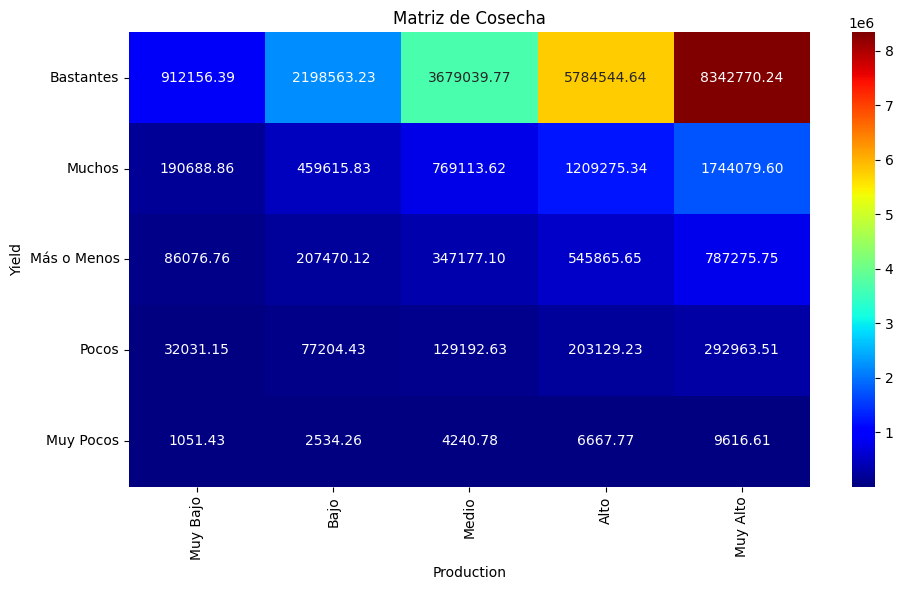

In [ ]:
MPo = matriz_cosecha(XCfo, XCso, lbfo, lbso, mostrar_grafica=True)

##4. Matriz Borrosa

In [ ]:
#Se evalua un solo valor de Rendimiento
Xf= 0.5
VPf = np.exp(-0.5*((XCfo-Xf)/sigmafo)**2)
print("El rendimiento es:", Xf)
print("Los labels de rendimiento son: \n", lbfo)
print("Los valores de pertenencia a los conjuntos borrosos son: \n", VPf.T)

El rendimiento es: 0.5
Los labels de rendimiento son: 
 ['Muy Pocos', 'Pocos', 'Más o Menos', 'Muchos', 'Bastantes']
Los valores de pertenencia a los conjuntos borrosos son: 
 [[0.99999403 0.99352207 0.94952376 0.80983538 0.5504006 ]]


In [ ]:
#Se evalua un solo valor de Producción
Xs= 1
VPs = np.exp(-0.5*((XCso-Xs)/sigmaso)**2)
print("La producción", Xs)
print("Los labels de producción son: \n", lbso)
print("Los valores de pertenencia a los conjuntos borrosos son: \n", VPs.T)

La producción 1
Los labels de producción son: 
 ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']
Los valores de pertenencia a los conjuntos borrosos son: 
 [[0.83978498 0.93668311 0.99193682 0.75560422 0.62810416]]


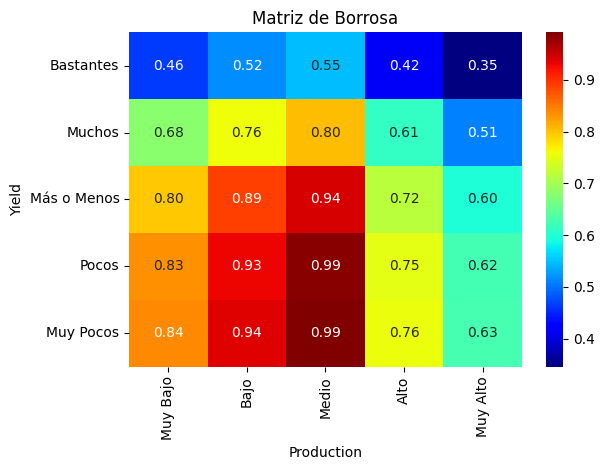

In [ ]:
MB= np.outer(VPf, VPs);
MB_ordenada= MB[::-1,:] #Inversión Vertical
lbf_ordenada = lbfo[::-1]

#Graficamos
plt.figure()
sns.heatmap(MB_ordenada, annot=True, cmap= 'jet', fmt= '.2f')
plt.title('Matriz de Borrosa')
plt.xlabel('Production')
plt.ylabel('Yield')
plt.xticks(np.arange(len(lbso))+ 0.5,lbso, rotation=90)
plt.yticks(np.arange(len(lbf_ordenada)) + 0.5, lbf_ordenada, rotation=0)
plt.tight_layout()
plt.show()

##5. Integración

In [ ]:
Xfe=np.array(dfe[:,0]); Xse=np.array(dfe[:,1])

In [ ]:
LDAo = dfo[:,0]*dfo[:,1]
LDAo=LDAo.reshape(-1,1)

In [ ]:
def integracion(XCf, XCs, sigmaf, sigmas, LDAo, Xfe, Xse):
  LDAe=[]; m1 = 0 #distribucion de perdidas externa
  #para todos los datos disponibles
  for k in range(len(Xfe)):
    VPf=np.exp(-0.5*((XCf-Xfe[k,])/sigmaf)**2)
    VPs=np.exp(-0.5*((XCs-Xse[k,])/sigmas)**2)
    VPmax=np.max(VPf)*np.max(VPs)

    if VPmax>0.99:
     m1+=1
     #print('Se procede con la integracion del registro:\n',k)
     LDAe.append(Xfe[k,]*Xse[k,])

  #la LDA de integracion es la siguiente
  LDAe=np.array(LDAe).reshape(-1,1)#solo datos integrados
  LDAint=np.vstack((LDAo, LDAe))#base de datos de integracion
  LDAe=Xfe*Xse #base de datos externa

  #Se procede con las gráficas
  plt.figure()
  sns.kdeplot(x=LDAo.flatten()/np.max(LDAo),fill=True,color='red',label='LDAo')
  sns.kdeplot(x=LDAe.flatten()/np.max(LDAo),fill=True,color='blue',label='LDAe')
  sns.kdeplot(x=LDAint.flatten()/np.max(LDAo),fill=True,color='green',label='LDAint')
  plt.xlim(-0.02,0.02)
  plt.legend()
  plt.grid()
  plt.show()

  return LDAe, LDAint, m1

In [ ]:
def indicadores_integrados(LDAo, LDAe, LDAint):
  #Datos Originales
  mo = np.array(pd.DataFrame(LDAo).describe())
  mo = np.vstack((mo, skew(LDAo))); mo= np.vstack((mo, np.percentile(LDAo, 99))); mo = np.vstack((mo, (mo[1,]+mo[9,])/2))

  #Datos Externos
  me = np.array(pd.DataFrame(LDAe).describe())
  me = np.vstack((me, skew(LDAe))); me= np.vstack((me, np.percentile(LDAe, 99))); me = np.vstack((me, (me[1,]+me[9,])/2))

  #Datos Integrados
  mint = np.array(pd.DataFrame(LDAint).describe())
  mint = np.vstack((mint, skew(LDAint))); mint= np.vstack((mint, np.percentile(LDAint, 99))); mint = np.vstack((mint, (mint[1,]+mint[9,])/2))

  dfe = pd.DataFrame(np.row_stack((mo.T, me.T, mint.T)))
  dfe.columns = ['Count', 'Mean/Productividad Esperadas', 'Std', 'Min', '25%', '50%', '75%', 'Max', 'Asimetría', 'OpVar-Productividad', 'Productividad No Esperadas']
  dfe.index = ['LDAo', 'LDAe', 'LDAint']
  display(dfe)

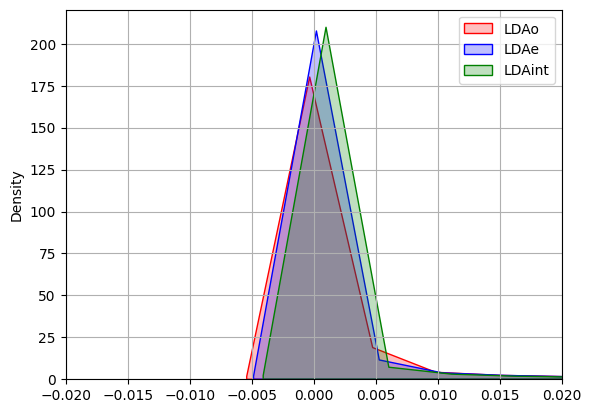

Los datos integrados fueron: 163544


In [ ]:
LDAe, LDAint, m1= integracion(XCfo, XCso, sigmafo, sigmaso, LDAo, Xfe, Xse)

print("Los datos integrados fueron:", m1)

In [ ]:
indicadores_integrados(LDAo, LDAe, LDAint)

,Count,Mean/Productividad Esperadas,Std,Min,25%,50%,75%,Max,Asimetría,OpVar-Productividad,Productividad No Esperadas
LDAo,191785.0,28572.634445,136398.467079,0.0,31.802778,312.219992,3542.400,6.654662e+06,10.281300,649622.271802,339097.453124
LDAe,266319.0,27607.721606,130784.741584,0.0,33.750000,314.600000,3516.495,6.649544e+06,10.220818,626842.071000,327224.896303
LDAint,355329.0,23215.556690,116307.457413,0.0,26.840000,246.913580,2679.120,6.654662e+06,10.988950,541005.810963,282110.683827


##6. Análisis de Resultados

El proceso de integración de las bases de datos de producción agrícola de la India, utilizando mapas de integración borrosos, ha permitido combinar la base de datos original (LDAo) con la base de datos externa (LDAe) para crear una base de datos integrada (LDAint). La base de datos original, con 191785 registros, presentaba una media de producción de 28572 y un coeficiente de asimetría de 10.28, lo que indica una distribución sesgada hacia valores altos de producción. Al integrar los datos con la base de datos externa, se lograron integrar un total de 163544 registros que compartían características borrosas similares en términos de producción y rendimiento. La base de datos integrada (LDAint) resultante, con 355329 registros, muestra una media de producción de 23215, ligeramente inferior a la base de datos original, y un coeficiente de asimetría de 10.98, lo que sugiere que la integración ha reforzado la presencia de valores de producción elevados, aunque la media general haya disminuido. Asimismo, gracias al OpVar (percentil 99), muestra que el 1% de los valores de producción más altos de los datos integrados son iguales o superiores a 541005. Esto representa una productividad no esperada o valores excepcionalmente altos dentro de los datos (282110). En conclusión, la integración borrosa ha permitido enriquecer el conjunto de datos original con información relevante de la base de datos externa, lo que resulta en una distribución de producción con una media ligeramente inferior y un sesgo más pronunciado hacia valores altos. Esto puede ser útil para la toma de decisiones al identificar patrones de producción más robustos y áreas de potencial rendimiento.